# Heart Attack Causes and Treatments

## Import Utilization Tools
Run cell before starting any code

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import
This code imports the datasets for heart attacks and displays the first 5 rows.

In [2]:
heart_attack = pd.read_csv("heart_attack_dataset.csv")

heart_attack.head()


,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


# Introduction
The purpose of sorting, organizing, and creating visuals for this dataset is to asses the causes of heart attacks, how changes can be made to prevent them, current treatments for the cause of heart attacks, and what demographics are most likely affected. <br>
The question I want to solve is: what are they largest causes of heart attacks and what are the most likely treatments?<br>
[Data Source](https://www.kaggle.com/datasets/waqi786/heart-attack-dataset) <br>
This data is taken from 1,000 patients who have had heart attacks and their treatments.**(This data may be inaccurate, will describe at the bottom)** <br>
Some features of this data-<br>
- <font color=blue>Age</font>
- <font color=red>Gender</font>
- <font color=green>Blood Pressure</font>
- <font color=pink>Cholesterol</font>
- <font color=orange>Diabetes(yes/no)</font>
- <font color=purple>Smoking Status(yes/no/was)</font>
- <font color=grey>Type of chest pain</font>
- <font color=black>Treatment</font><br>
<br>




## Check To See If There Are Any Empty or Missing Data 
This is to make sure that there are no empty or missing values in the dataset that may require fixing or removing.

In [3]:
missing_values = heart_attack.isnull().sum()

print(missing_values[missing_values > 0])

Series([], dtype: int64)


## Data Pre-Processing
Making sure to organize data by types and converting it so it can be used in visuals easier.

### Check Column DataType

In [4]:
heart_attack.dtypes

Gender                   object
Age                       int64
Blood Pressure (mmHg)     int64
Cholesterol (mg/dL)       int64
Has Diabetes             object
Smoking Status           object
Chest Pain Type          object
Treatment                object
dtype: object

### Fix Age
So that we can make sure all ages of the dataset are used.

In [5]:
heart_attack['Age'] = heart_attack['Age'].fillna(-1.0)

print(heart_attack['Age'].isnull().sum())

0


# 1. Age and Relation to Heart Attacks
We will look at the relation between age and heart attacks.

### 1.a Number of Heart Attacks by Age.
Create a lineplot that goes over the amount of hear attacks per age.

<Figure size 5000x5000 with 0 Axes>

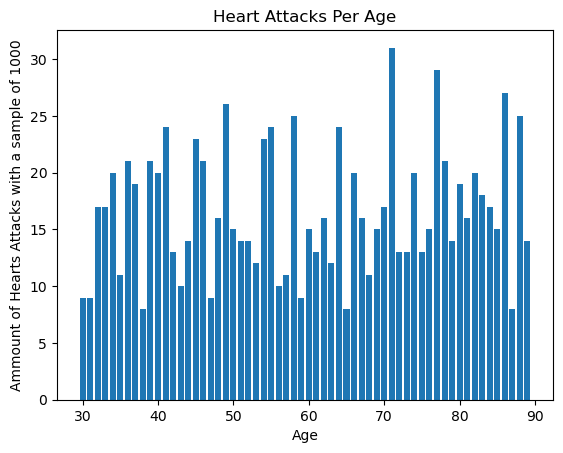

<Figure size 5000x5000 with 0 Axes>

In [6]:
age_counts = heart_attack['Age'].value_counts()

plt.bar(x=age_counts.index, height=age_counts.values)
plt.title("Heart Attacks Per Age")
plt.xlabel("Age")
plt.ylabel("Ammount of Hearts Attacks with a sample of 1000")
plt.figure(figsize=(50,50))

## What this Graph Tells Us.
This Graph shows the average ages for when someone may have a heart attack. Of course this data isn't perfect, it doesn't compare the data to a random sample in which the population includes people who haven't had heart attacks, however this data does show that if there are health risk factors in, your life what age you might expect to have a heart attack. This graph also shows how no matter the age, as long as your lifestyle is unhealthy you are at risk of heart attack.

# Amount of Men and Women Who have Diabetes when they had a Heart Attack


C:\Users\logan\AppData\Local\Temp\ipykernel_10524\99167457.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  diabetes = pd.value_counts(heart_attack['Has Diabetes'])


Text(0, 0.5, 'Frequency')

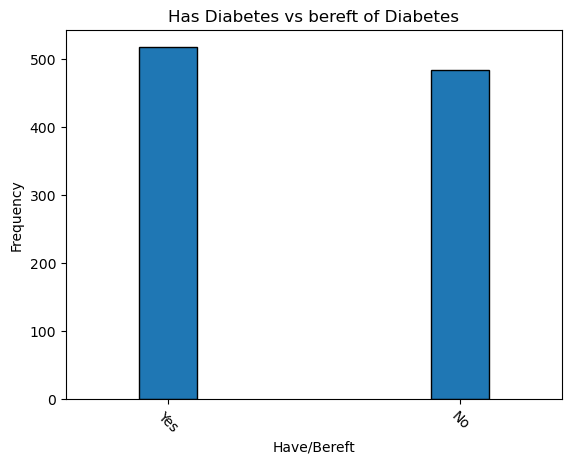

In [83]:
diabetes = pd.value_counts(heart_attack['Has Diabetes']) 
labels = ['Yes', 'No']
diabetes.plot(kind = 'bar', rot=315, width=0.2, edgecolor=['black'])
plt.title("Has Diabetes vs bereft of Diabetes")
plt.xticks(range(2), labels)
plt.xlabel("Have/Bereft")
plt.ylabel("Frequency")



Has Diabetes
Yes    517
No     483
Name: count, dtype: int64


## What Does this tell us?
This is a pretty simple graph that tells us that of the 1000 sample, slightly over half of the sample has Diabetes. That shows that people with Diabetes have have a higher risk in having a heart attack. **After reviewing all my other charts, I have reason to believe this sample isn't random, more on that below.**

## (**Below is when I figured my data was a little suspicious**)

# Smoking Status, Blood Pressure, and Cholesterol

## Blood Pressure to Cholesterol
The purpose of the scatterplot(and lineplot using the same values) is to look at a correlation between the values by looking at density ranges.

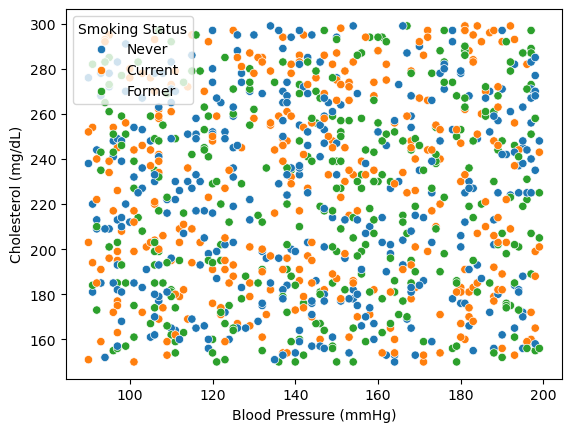

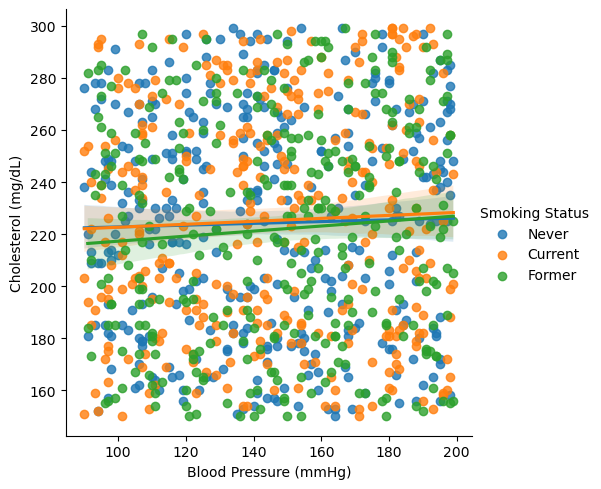

In [57]:
sns.scatterplot(x=heart_attack['Blood Pressure (mmHg)'] ,y=heart_attack['Cholesterol (mg/dL)'], hue=heart_attack['Smoking Status'])
sns.lmplot(x="Blood Pressure (mmHg)", y="Cholesterol (mg/dL)", hue="Smoking Status", data=heart_attack)



## Comparing Smoking(X) by Cholesterol(Y)
### While the Color Hue represents Blood pressure range(Pink-Purple)

<Axes: xlabel='Smoking Status', ylabel='Cholesterol (mg/dL)'>

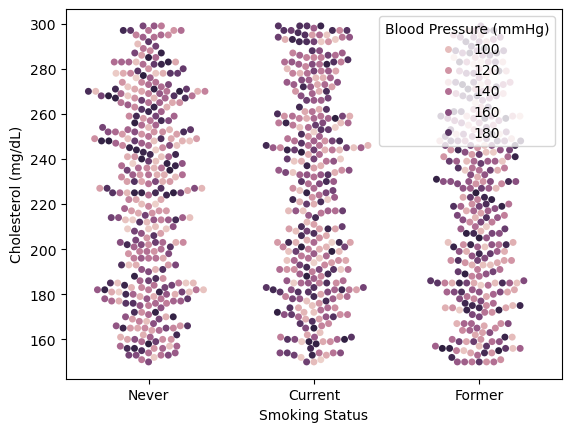

In [61]:

sns.swarmplot(x=heart_attack['Smoking Status'],
              y=heart_attack['Cholesterol (mg/dL)'],
             hue=heart_attack['Blood Pressure (mmHg)'],
             size = 5)

## What do these 3 Charts Tell Us?
### **Absolutely Nothing!!!!**
When trying to make these charts I've tried switching Blood Pressure, Cholesterol, and Smoking Status around just to see what results I could get.
However after making the third chart I've come up with a hypothesis on why these 3 tables show how little they affect each other. Thearetically I was looking for a way to display how when someone smokes it may affect their blood pressure or cholesterol or how certain ranges may correlate but all three tables look random, have evenly spaced data, and follow identical patterns. I believe the data is either fake or the sample that was taken actually wasn't random but instead looking for patients with an equal distribution in each factor which makes predictive modeling impossible. This is especially noticeable when looking at the lineplot as it shows how there is almost no correlation between all three factors. It's just a shame that it can't be used to help people.
